In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RLC sovrasmorzato.csv'
fr = pd.read_csv(FILE)

In [23]:
t = np.array(fr['t (us)'])[8:] * 10**-6
V = np.array(fr['V (Volt)'])[8:]
sigmaV = np.sqrt((V*0.01)**2 + (0.04 / np.sqrt(12))**2)

R = 9980 + 58.5 #ohm
sigmaR = R * 0.01

L = 88.8 * 10**-3 #Hr
sigmaL = 0.9* 10**-3 #Hr

C =  104.7* 10**-9 # ± 0.3)e-9 F
sigmaC = 1.1 * 10**-9 # F

Vg = 4 #Volt

$
\beta = \sqrt{\omega^2 - \gamma^2}
$

In [24]:
w2 = 1 / (L*C)
sigmaw2 = np.abs(1/(L*C))*np.sqrt((sigmaL/L)**2 + (sigmaC/C)**2)

γ = R / (2*L)
dγ_dR = 1 / (2 * L)
dγ_dL = -R / (2 * L**2)
sigmaγ = np.sqrt((dγ_dR * sigmaR)**2 + (dγ_dL * sigmaL)**2)

β = np.sqrt(γ**2 - w2)
dβ_dw = 0.5 / np.sqrt(γ**2 - w2)
dβ_dγ = -γ / np.sqrt(γ**2 - w2)
sigmaβ = np.sqrt((dβ_dw * sigmaw2)**2 + (dβ_dγ * sigmaγ)**2)

print('---------------- EXPECTED VALUES ----------------')
print('w2 =', final_val(w2, sigmaw2,exp=7,decimals=3))
print('γ =', final_val(γ, sigmaγ,exp=3,decimals=3))
print('β =', final_val(β, sigmaβ,exp=3,decimals=3))

---------------- EXPECTED VALUES ----------------
w2 = (10.756 ± 0.157)e7 
γ = (56.523 ± 0.805)e3 
β = (55.563 ± 0.819)e3 


$
V_r = V_0 \cdot e^{-\gamma t} \cdot (\exp(\beta t) - \exp(-\beta t))
$

In [25]:
def VR_sovrasmorzato(t,V0,γ,β):
    return V0 * np.exp(-γ*t) * (np.exp(β*t) - np.exp(-β*t))

In [26]:
Vg_guess = 4 #Volt
i = Interpolazione(t,V,VR_sovrasmorzato,sigmaV,p0=[Vg_guess,γ,β])
print(i)

   
Parameters: [7.90963472e+00 5.64912706e+04 5.54713447e+04] 
Sigma parameters: [9.79826646e-03 1.40679456e+03 1.40747103e+03]

sigmaY: [0.07529073 0.07568602 0.07331503 0.07094599 0.06818485 0.06582077
 0.06404946 0.06070826 0.05874601 0.0563948  0.05443871 0.05209581
 0.05014752 0.04820346 0.04626417 0.04471659 0.04317283 0.04124916
 0.04009855 0.03818761 0.03704556 0.03552877 0.03439612 0.03289336
 0.0321455  0.03102859 0.02991811 0.02881481 0.02771955 0.02699432
 0.02591473 0.02520106 0.0241407  0.02344127 0.02274848 0.02206294
 0.02138535 0.02104978 0.02038562 0.01973153 0.01940859 0.01877161
 0.01845788 0.01784078 0.01753777 0.01723872 0.01665333 0.01636745
 0.01608643 0.01581055 0.01554006 0.01527525 0.01476392 0.01427912
 0.01382365 0.01360784 0.01320202 0.01301281 0.01283329 0.01266386
 0.01250493 0.01235691 0.0122202  0.0122202  0.01209518 0.01198221
 0.01198221 0.01188164 0.01179378 0.01171893 0.01171893 0.01165733
 0.01165733 0.01160919 0.01160919 0.01157469 0.01157469 0.

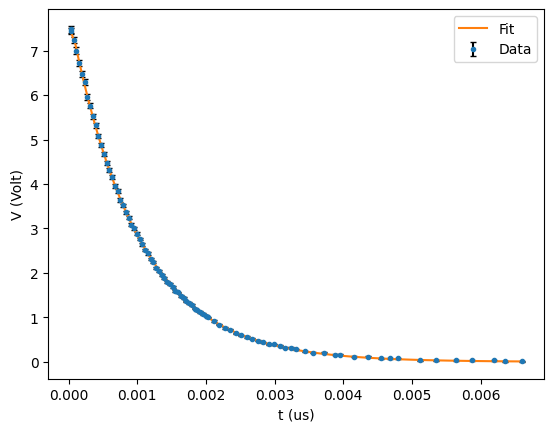

In [27]:
plt.errorbar(t, V, yerr=sigmaV, fmt='.', label='Data',ecolor='black',capsize=2)
plt.plot(i.x_best, i.y_best, label='Fit')
plt.xlabel('t (us)')
plt.ylabel('V (Volt)')
plt.legend()
plt.show()

### CONFRONTO VALORI

In [28]:
_,γf,βf = i.bval
_,sigmaγf,sigmaβf = i.sigma_bval

print('---------------- EXPECTED VALUES ----------------')
print('w2 =', final_val(w2, sigmaw2,exp=7,decimals=3))
print('γ =', final_val(γ, sigmaγ,exp=3,decimals=3))
print('β =', final_val(β, sigmaβ,exp=3,decimals=3))

print('---------------- FITTED VALUES ----------------')
print('γ = ',final_val(γf,sigmaγf,decimals=3,exp=3))
print('β = ',final_val(βf,sigmaβf,decimals=3,exp=3))
tγ = np.round(np.abs(γf - γ) / np.sqrt(sigmaγ**2 + sigmaγf**2),3)
tβ = np.round(np.abs(βf - β) / np.sqrt(sigmaβ**2 + sigmaβf**2),3)
print('t (γ) =', tγ)
print('t (β) =', tβ)

---------------- EXPECTED VALUES ----------------
w2 = (10.756 ± 0.157)e7 
γ = (56.523 ± 0.805)e3 
β = (55.563 ± 0.819)e3 
---------------- FITTED VALUES ----------------
γ =  (56.491 ± 1.407)e3 
β =  (55.471 ± 1.407)e3 
t (γ) = 0.02
t (β) = 0.057
